# AIM0404D2203 Lab 2 Topic Modelling (Gensim)
---
<br>
<div style="font-size:20px;color:green;text-align:center"><strong>Dataset Dokumen Berita (Gensim) </strong></div>
<br>
<img align=center src= "https://www.researchgate.net/publication/331669603/figure/fig1/AS:735488403070977@1552365508288/The-flow-of-LDA-Retrieved-from-https-toolboxkuriocoid-topic-modeling-696d7ba2592f.png">

<h1>Penjelasan Hands On</h1>

Pada pertemuan ini, kita akan belajar Topic Modeling menggunakan algoritme LDA (Latent Dirichlet Allocation). Kasus yang akan kita selesaikan yaitu terkait dokumen berita. Kita akan mengekstrak dokumen berita tersebut untuk mendapatkan topik-topik penting yang ada di dalamnya.

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<div><h3 style="font-size:30px;color:black;text-align:center"><strong>Topic Modeling Pipeline</strong> </h3></div>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [ ]:
#Download dataset di bawah ini
#!wget https://docs.google.com/spreadsheets/d/180ghjRmSRcR2iRVxBwZtVuhe7UumRcyD/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true

In [ ]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#reading the dataset
data= pd.read_excel('dataset_documents_indonesia.xlsx')
data.head(5)

,Unnamed: 0,Article Title,Article Link,Article Content
0,1,\n 7 Hobi yang Bisa Datangkan C...,https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya seba...
1,2,"\n Perbanyak Ahli Gunung Api, I...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...
2,3,\n PTM Terbatas 2022 di Jakarta...,https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...
3,4,\n Mengapa Perlu Menjaga Kelest...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...
4,5,\n Cara Membuat Surat Lamaran K...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...


# 02 Text Preprocessing

In [ ]:
#preprocessing 
def removeStopword(str):
    #stop_words = stopwords.words('english')
    # get stopword indonesia
    stop_words  = stopwords.words('indonesian')
    stop_words.extend(["twupal","detikers"])

    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)#remove sentence which contains only one word

def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
       
    return str

def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

In [ ]:
# !pip install swifter 
# Install swifter. digunakan untuk meningkatkan kecepatan proses pandas

import swifter

In [ ]:
%%time
data['clean_article'] = data['Article Content'].swifter.apply(preprocessing)

Pandas Apply:   0%|          | 0/2434 [00:00<?, ?it/s]

CPU times: total: 38.1 s
Wall time: 38.2 s


In [ ]:
data['token'] = [nltk.word_tokenize(i) for i in data.clean_article] #tokenize string

In [ ]:
data

,Unnamed: 0,Article Title,Article Link,Article Content,clean_article,token
0,1,\n 7 Hobi yang Bisa Datangkan C...,https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya seba...,orang menganggap hobi sebatas hiburan menghila...,"[orang, menganggap, hobi, sebatas, hiburan, me..."
1,2,"\n Perbanyak Ahli Gunung Api, I...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...,institut teknologi nasional itn yogyakarta mem...,"[institut, teknologi, nasional, itn, yogyakart..."
2,3,\n PTM Terbatas 2022 di Jakarta...,https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...,pemerintah provinsi dki jakarta kepala dinas p...,"[pemerintah, provinsi, dki, jakarta, kepala, d..."
3,4,\n Mengapa Perlu Menjaga Kelest...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...,tanaman bakau salah ekosistem tumbuh muara sun...,"[tanaman, bakau, salah, ekosistem, tumbuh, mua..."
4,5,\n Cara Membuat Surat Lamaran K...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...,curriculum vitae cv surat lamaran kerja efekti...,"[curriculum, vitae, cv, surat, lamaran, kerja,..."
...,...,...,...,...,...,...
2429,2430,"\n Terbang ke Italia, Pembalap ...",https://sport.detik.com/fotosport/d-5895358/te...,Jakarta - Ikatan Motor Indonesia (IMI) melepas...,jakarta ikatan motor indonesia imi melepas sal...,"[jakarta, ikatan, motor, indonesia, imi, melep..."
2430,2431,\n IBL 2022 Sudah Bisa Ditonton...,https://sport.detik.com/basket/d-5894646/ibl-2...,Indonesia Basketball League (IBL) 2022 akhirny...,indonesia basketball league ibl dihadiri penon...,"[indonesia, basketball, league, ibl, dihadiri,..."
2431,2432,\n Pratama Arhan Digandrungi Fa...,https://sport.detik.com/detiktv/d-5894639/prat...,"Pemain sepak bola Indonesia, Pratama Arhan men...",pemain sepak bola indonesia pratama arhan mena...,"[pemain, sepak, bola, indonesia, pratama, arha..."
2432,2433,\n Indonesia Patriots Tak Ingin...,https://sport.detik.com/basket/d-5894391/indon...,Indonesia Patriots diharapkan tampil baik di s...,indonesia patriots diharapkan tampil laga ibl ...,"[indonesia, patriots, diharapkan, tampil, laga..."


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(data['token'])
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).print(dictionary)

In [ ]:
print(dictionary)

Dictionary(8382 unique tokens: ['alat', 'aneka', 'barang', 'basis', 'bekas']...)


# 03 Feature Extraction

In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['token']]
#The function doc2bow converts document (a list of words) into the bag-of-words format

'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''

print(len(doc_term_matrix))

print(doc_term_matrix)

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model

corpus_tfidf = tfidf[doc_term_matrix]

2434
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 6), (24, 1), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 2), (42, 3), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 12), (49, 1), (50, 2), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 3), (57, 1), (58, 1), (59, 2), (60, 1), (61, 3), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 2), (73, 4), (74, 1), (75, 3), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 4), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 3), (94, 1), (95, 2), (96, 1), (97, 1), (98, 8), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 2), (107, 2), (108, 1), (109, 1), (1

# 04 Coherence Score
Menentukan jumlah k (topik) terbaik pada LDA

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

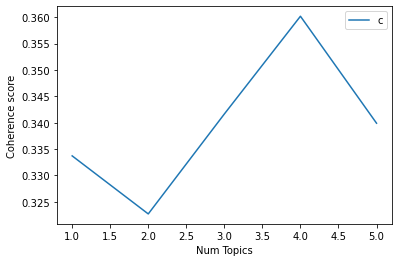

In [ ]:
start=1
limit=6
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=data['token'], limit=limit, start=start, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.333709
Num Topics = 2  has Coherence Value of 0.322714
Num Topics = 3  has Coherence Value of 0.341649
Num Topics = 4  has Coherence Value of 0.360164
Num Topics = 5  has Coherence Value of 0.3399


# 05 LDA Model

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print('\n')

Topic: 0 Word: 0.006*"kendaraan" + 0.005*"eijkman" + 0.004*"arus" + 0.004*"puncak" + 0.003*"lintas" + 0.003*"arah" + 0.003*"banjir" + 0.003*"one" + 0.003*"wib" + 0.003*"pengunjung"


Topic: 1 Word: 0.002*"djokovic" + 0.002*"warga" + 0.002*"korban" + 0.002*"vaksinasi" + 0.002*"covid" + 0.002*"pemain" + 0.002*"minggu" + 0.002*"corona" + 0.002*"vaksin" + 0.002*"tim"


Topic: 2 Word: 0.003*"bahar" + 0.002*"habib" + 0.002*"batu" + 0.002*"brigjen" + 0.002*"vaksin" + 0.002*"achmad" + 0.002*"omicron" + 0.002*"vaksinasi" + 0.001*"hendra" + 0.001*"basket"


Topic: 3 Word: 0.003*"dki" + 0.002*"korban" + 0.002*"anies" + 0.002*"warga" + 0.002*"tiket" + 0.002*"motogp" + 0.002*"kota" + 0.002*"kebakaran" + 0.002*"riza" + 0.002*"tim"




Berdasarkan topik yang ditemukan di atas, kita bisa menyimpulkan bahwa topik 0 membahas terkait dokumen berita terkini

# 06 Topic Modeling Visualization

In [ ]:
import gensim
import pyLDAvis.gensim_models;
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
data
#print(data)
#pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.023098  0.037045       1        1  42.306671
3     -0.009922 -0.041293       2        1  21.926042
2     -0.027412 -0.002155       3        1  20.912678
0      0.060432  0.006402       4        1  14.854609, topic_info=           Term       Freq      Total Category  logprob  loglift
1166  kendaraan  18.000000  18.000000  Default  30.0000  30.0000
1580    eijkman  13.000000  13.000000  Default  29.0000  29.0000
2182       arus  14.000000  14.000000  Default  28.0000  28.0000
1627     puncak  14.000000  14.000000  Default  27.0000  27.0000
2364     lintas  10.000000  10.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
3196      jalur   3.477982   9.451244   Topic4  -6.4832   0.9072
1320     minggu   4.022052  22.375721   Topic4  -6.3379   0.1907
353       warga   4.114299  28.206057   Topic4  -6.3152  -0.0182
100      pemain   3.772242  20.879149   Topic4  -6.4020   0.1958
135         tim   3.695737  21.030318   Topic4  -6.4225   0.1681

[262 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
8243      3  0.673001  abdurachman
1554      3  0.754243       achmad
1554      4  0.150849       achmad
8344      1  0.247309        ahsan
8344      2  0.123655        ahsan
...     ...       ...          ...
8203      1  0.280153    wisatawan
8203      4  0.560307    wisatawan
5360      1  0.981235        zikir
7643      2  0.301474        zikri
7643      3  0.602948        zikri

[455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

# 07 Student Activity

Silahkan pahami dengan baik Topic Modeling pipeline di atas, kemudian kerjakan soal di bawah ini:

1. Terapkan Topic Modeling Pipeline di atas pada data yang berbeda dan tarik kesimpulan topik yang anda dapatkan. 
2. Data bisa menggunakan ini <a href="https://docs.google.com/spreadsheets/d/1OvKGTnyE3LnP-E6dtwOSLa1IK-ZdrR_i/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true"> Klik</a>
3. Presentasikan hasil anda di kelas (Coach akan menunjuk beberapa perwakilan untuk presentasi). Persiapkan dengan baik yah.